## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas 불러오기
import pandas as pd
import seaborn as sns
import plotly.express as px

* [FinanceData/FinanceDataReader: Financial data reader](https://github.com/FinanceData/FinanceDataReader)
* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)

In [2]:
# colab 을 사용한다면 런타임이 초기화 될때마다 다시 설치해 주어야 합니다.
# 로컬 컴퓨터에 설치했다면 이전에 설치된 라이브러리를 사용해 주시면 됩니다.
# !pip install -U finance-datareader

In [3]:
# FinanceDataReader 를 fdr 별칭으로 불러오기
import FinanceDataReader as fdr

## 상장종목 목록 가져오기

In [7]:
#  fdr.StockListing 으로 KRX 전체 종목 가져오기
# df_krx
df_krx = fdr.StockListing("KRX")
df_krx.shape

(7045, 10)

In [8]:
# head 로 미리보기
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,박대현,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [16]:
# 제약업종 찾기
# 대웅, 셀트리온, 한미 등의 Sector, Industry 가 무엇으로 되어 있는지 찾습니다.
df_krx[df_krx['Name'].str.contains('대웅|한미약품|셀트리온') & df_krx['Sector'].notnull()]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2327,003090,KOSPI,대웅,기타 금융업,"지주회사/의약품,화공약품,농예약품,위생용품,의료용구,식품,전기전자기구,부품 제조,판매",1973-06-26,12월,윤재춘,http://www.daewoong.com/,경기도
2328,069620,KOSPI,대웅제약,의약품 제조업,"양약,의료기기 제조/화장품,의약부의품 도소매/부동산 임대",2002-11-01,12월,"전승호, 윤재춘",http://www.daewoong.co.kr,경기도
3660,068270,KOSPI,셀트리온,기초 의약물질 및 생물학적 제제 제조업,"램시마, 트룩시마, 허쥬마",2018-02-09,12월,기우성,http://www.celltrion.com,인천광역시
3661,068760,KOSDAQ,셀트리온제약,의약품 제조업,무선인터넷서비스및플랫폼,2006-02-03,12월,서정수,http://www.celltrionph.com,충청북도
3662,091990,KOSDAQ,셀트리온헬스케어,기타 전문 도매업,바이오의약품 마케팅 및 판매,2017-07-28,12월,김형기,http://www.celltrionhealthcare.com/kr/index.do,인천광역시
6862,128940,KOSPI,한미약품,의약품 제조업,의약품,2010-07-30,12월,"우종수, 권세창",NaN,경기도


In [25]:
# 제약|의약|바이오 Sector 를 찾아서 "Symbol", "Name" 만 가져와 df_drug 에 담습니다.
df_drug = df_krx.loc[df_krx['Sector'].notnull() & df_krx['Sector'].str.contains('제약|의약|바이오')
      &df_krx['Industry'].notnull() & df_krx['Industry'].str.contains('제약|의약|바이오'), ['Symbol', 'Name']].copy()
df_drug.head()

,Symbol,Name
63,058820,CMG제약
1593,114450,KPX생명과학
2104,009290,광동제약
2126,002720,국제약품
2235,234690,녹십자웰빙


In [29]:
# df_drug 의 인덱스 값에는 종목코드(심볼)가 들어있습니다.
df_drug = df_drug.set_index('Symbol')
df_drug.head()

,Name
Symbol,
058820,CMG제약
114450,KPX생명과학
009290,광동제약
002720,국제약품
234690,녹십자웰빙


In [30]:
df_drug.index

Index(['058820', '114450', '009290', '002720', '234690', '078140', '036480',
       '069620', '003220', '006620', '002210', '000020', '176750', '086900',
       '017180', '003850', '003000', '207940', '001360', '005500', '049180',
       '019170', '175250', '260660', '196300', '179530', '174900', '041910',
       '237690', '298380', '003060', '183490', '003520', '002630', '330350',
       '206650', '000220', '000100', '048530', '000230', '003120', '007570',
       '271980', '034940', '063160', '001630', '214370', '102940', '246710',
       '046210', '214450', '004720', '222110', '087010', '220100', '334970',
       '293480', '080720', '032300', '002390', '128940', '009420', '061250',
       '016580', '243070', '084110'],
      dtype='object', name='Symbol')

In [32]:
# df_drug 의 Name의  values 에는 종목명이 들어있습니다.
df_drug.values.flatten()

array(['CMG제약', 'KPX생명과학', '광동제약', '국제약품', '녹십자웰빙', '대봉엘에스', '대성미생물',
       '대웅제약', '대원제약', '동구바이오제약', '동성제약', '동화약품', '듀켐바이오', '메디톡스', '명문제약',
       '보령제약', '부광약품', '삼성바이오로직스', '삼성제약', '삼진제약', '셀루메드', '신풍제약', '아이큐어',
       '알리코제약', '애니젠', '애드바이오텍', '앱클론', '에스텍파마', '에스티팜', '에이비엘바이오',
       '에이프로젠제약', '엔지켐생명과학', '영진약품', '오리엔트바이오', '위더스제약', '유바이오로직스',
       '유유제약', '유한양행', '인트론바이오', '일동홀딩스', '일성신약', '일양약품', '제일약품', '조아제약',
       '종근당바이오', '종근당홀딩스', '케어젠', '코오롱생명과학', '티앤알바이오팹', '파나진', '파마리서치',
       '팜젠사이언스', '팬젠', '펩트론', '퓨쳐켐', '프레스티지바이오로직스', '하나제약', '한국유니온제약',
       '한국파마', '한독', '한미약품', '한올바이오파마', '화일약품', '환인제약', '휴온스', '휴온스글로벌'],
      dtype=object)

## 여러 종목의 종가 수집
* 종목코드로 수집이 가능합니다.
* 종목명을 찾아서 일별 시세를 수집해 주는 함수를 만들어 볼 예정입니다.

In [38]:
from tqdm import tqdm
# 반복문을 사용하여 여러 종목의 종가를 수집합니다.
item_list = []

for symbol in tqdm(df_drug.index[:20]):
    close = fdr.DataReader(symbol, '2020')['Close']
    item_list.append(close)

100%|██████████████████████████████████████████| 20/20 [00:04<00:00,  4.24it/s]


In [39]:
item_list

[Date
 2020-01-02    4400
 2020-01-03    4220
 2020-01-06    4020
 2020-01-07    4060
 2020-01-08    3870
               ... 
 2021-05-31    4640
 2021-06-01    4605
 2021-06-02    4575
 2021-06-03    4635
 2021-06-04    4625
 Name: Close, Length: 353, dtype: int64,
 Date
 2020-01-02     6140
 2020-01-03     7200
 2020-01-06     6780
 2020-01-07     7090
 2020-01-08     7350
               ...  
 2021-05-31    10600
 2021-06-01    10250
 2021-06-02     9720
 2021-06-03     9630
 2021-06-04     9600
 Name: Close, Length: 353, dtype: int64,
 Date
 2020-01-02    6660
 2020-01-03    6660
 2020-01-06    6570
 2020-01-07    6570
 2020-01-08    6300
               ... 
 2021-05-31    9110
 2021-06-01    9130
 2021-06-02    9080
 2021-06-03    9090
 2021-06-04    9140
 Name: Close, Length: 353, dtype: int64,
 Date
 2020-01-02    4495
 2020-01-03    4558
 2020-01-06    4481
 2020-01-07    4739
 2020-01-08    4395
               ... 
 2021-05-31    6970
 2021-06-01    7040
 2021-06-02    6990
 2

### 하나의 데이터프레임으로 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [42]:
# 수집한 리스트를 axis=1(컬럼)을 기준으로 병합(concat) 합니다.
# df
df = pd.concat(item_list, axis=1)
df.columns = df_drug['Name'][:20]
df

Name,CMG제약,KPX생명과학,광동제약,국제약품,녹십자웰빙,대봉엘에스,대성미생물,대웅제약,대원제약,동구바이오제약,동성제약,동화약품,듀켐바이오,메디톡스,명문제약,보령제약,부광약품,삼성바이오로직스,삼성제약,삼진제약
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,4400,6140,6660,4495,10750,6970,16100,136500,15988,5719,16050,8400,9700,274472,4623,14683,12839,428500,4390,24800
2020-01-03,4220,7200,6660,4558,10550,6940,16400,135500,15895,5736,16100,8360,9450,284333,4632,14459,12610,422000,4370,25000
2020-01-06,4020,6780,6570,4481,10150,6790,16100,132000,15849,5618,15300,8180,9280,275659,4427,14236,11834,412000,4170,24650
2020-01-07,4060,7090,6570,4739,10250,6860,16150,134000,15802,5584,15550,8160,9000,294925,4543,14146,11925,419000,4195,24700
2020-01-08,3870,7350,6300,4395,9630,6550,15100,129500,15617,5178,14600,7930,9100,287803,4240,13564,12062,408500,3925,23800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,4640,10600,9110,6970,11750,11100,19800,153500,16000,9430,10950,14650,10350,169800,5600,22163,21150,845000,11250,26050
2021-06-01,4605,10250,9130,7040,12250,11100,19850,156500,16050,9580,10950,14600,10300,170900,5620,22750,21200,832000,10250,26800
2021-06-02,4575,9720,9080,6990,11750,11150,20450,156000,16050,9440,10900,14500,10300,169200,5590,22700,20950,818000,10450,27800


In [44]:
px.line(df)

### 시각화를 위한 폰트 설정

In [47]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

* 그래프의 다양한 style 설정 : [Customizing Matplotlib with style sheets and rcParams — Matplotlib documentation](https://matplotlib.org/3.3.3/tutorials/introductory/customizing.html)

In [48]:
get_font_family()

'Malgun Gothic'

In [49]:
# 시각화를 위한 폰트설정
import matplotlib.pyplot as plt

# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당
font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프 스타일 설정
plt.style.use("ggplot")

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

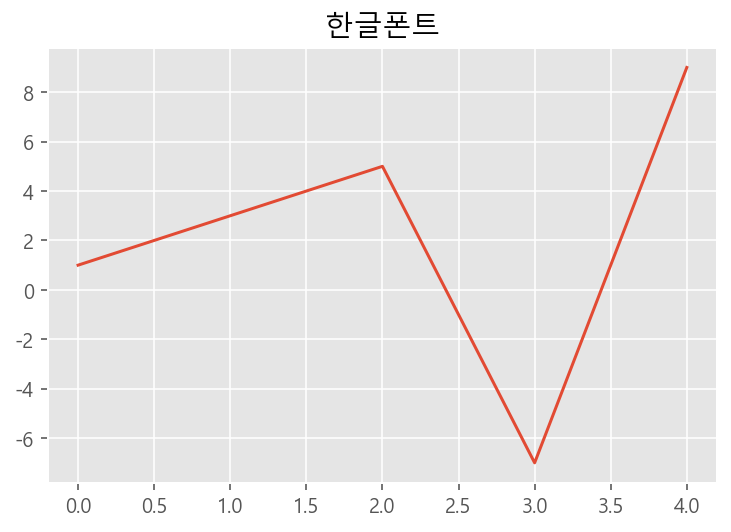

In [50]:
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 여러 종목 한번에 시각화 하기

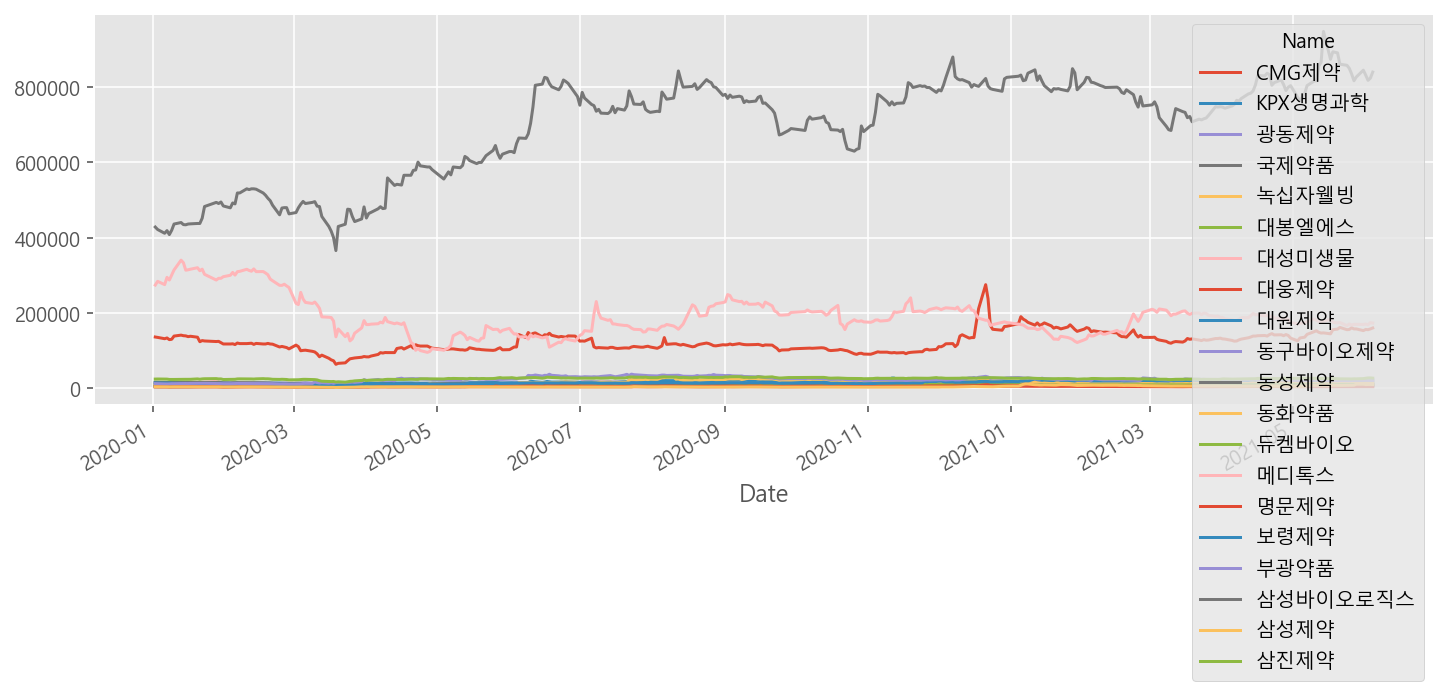

In [52]:
# 판다스의 plot을 통한 전체 데이터 프레임 시각화
df.plot(figsize=(12, 4))

In [53]:
# px.line 으로 시각화
px.line(df)

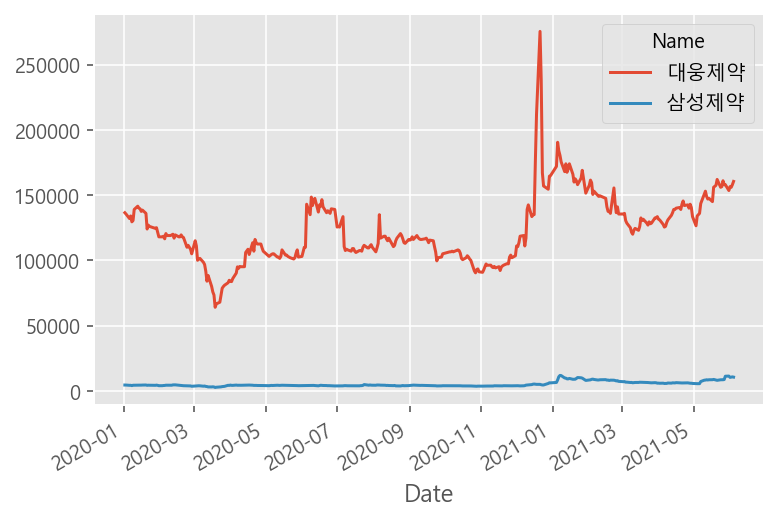

In [61]:
# 2개의 종목 비교하기: 2개 종목명을 골라 plot으로 시각화 합니다.
df[['대웅제약', '삼성제약']].plot()

In [56]:
# px.line 으로 2개 종목만 골라 시각화 합니다.
px.line(df[['대웅제약', '삼성제약']])

## 2축 그래프 사용하기

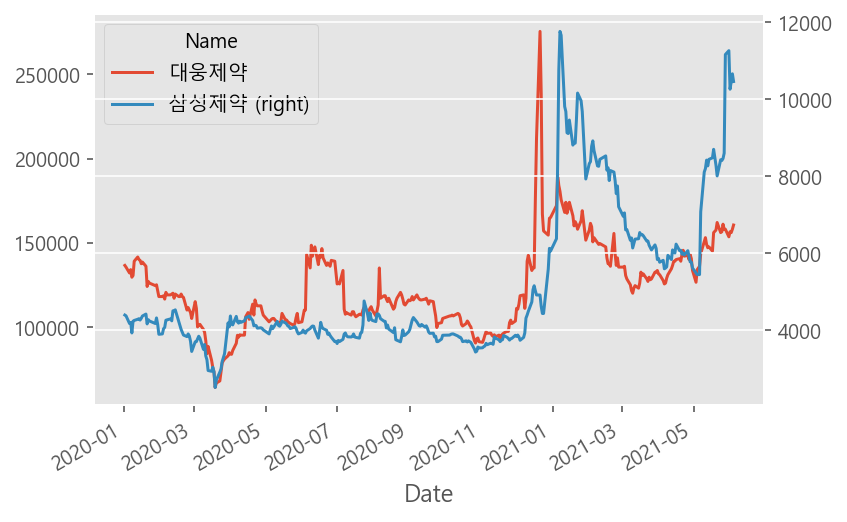

In [60]:
# secondary_y를 사용해 2축 그래프 그리기
df[['대웅제약', '삼성제약']].plot(secondary_y='삼성제약')

## 기간 수익률 비교하기
* 가격마다 스케일이 다르기 때문에 데이터프레임 기준 첫날을 0으로 맞추고 상대적으로 상승했는지 하락했는지에 대한 값을 구합니다.
* 다른 스케일 값의 상승/하락 비율을 비교해 볼 수 있도록 합니다.
* 다른 스케일의 값을 조정할 때 표준화 혹은 정규화 방법을 사용하기도 합니다.
    * 표준화(standardization) : 
        * 데이터가 평균으로 부터 얼마나 떨어져 있는지 나타내는 값으로 변환
        * (Z-score 표준화) : (측정값 - 평균) / 표준편차
    * 정규화(normalization) : 
        * 데이터의 상대적 크기에 대한 영향을 줄이기 위해 0~1로 변환
        * (측정값 - 최소값) / (최대값 - 최소값)

In [65]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# df_plot 에 수익률을 담아줍니다.
df2 = df[["대웅제약", "삼성제약"]]
# 가격 / 첫번째날 가격 -1
df_plot_norm = df2 / df2.iloc[0] -1
df_plot_norm

Name,대웅제약,삼성제약
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,-0.007326,-0.004556
2020-01-06,-0.032967,-0.050114
2020-01-07,-0.018315,-0.044419
2020-01-08,-0.051282,-0.105923
...,...,...
2021-05-31,0.124542,1.562642
2021-06-01,0.146520,1.334852
2021-06-02,0.142857,1.380410


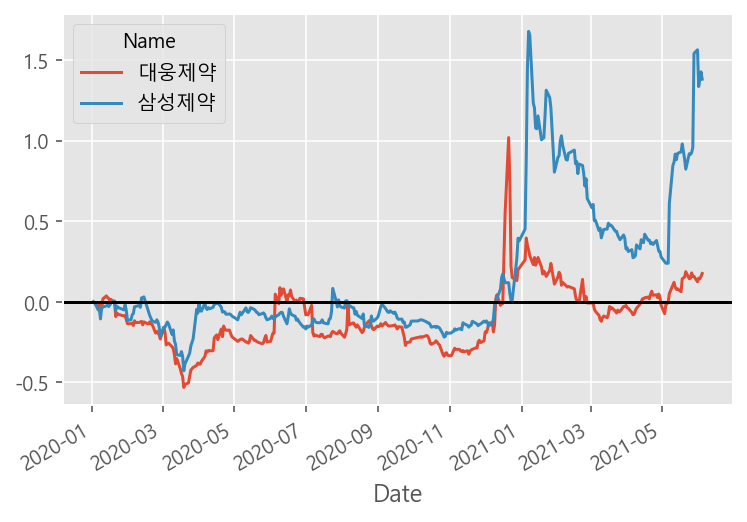

In [70]:
# 수익률 시각화 하기
df_plot_norm.plot()
plt.axhline(0, c='k')

## pyplot의 subplots 로 서브플롯 그리기

In [ ]:
# pyplot의 subplots로 2개의 서브플롯을 만들고 2축그래프와 수익률 그래프를 비교해 봅니다.
# fig, axes = plt.subplots(1, 2, figsize=(15, 4))


In [71]:
# df_plot_norm 데이터프레임을 통해 수익률의 분포를 histogram으로 시각화 합니다.
df_plot_norm

Name,대웅제약,삼성제약
Date,,
2020-01-02,0.000000,0.000000
2020-01-03,-0.007326,-0.004556
2020-01-06,-0.032967,-0.050114
2020-01-07,-0.018315,-0.044419
2020-01-08,-0.051282,-0.105923
...,...,...
2021-05-31,0.124542,1.562642
2021-06-01,0.146520,1.334852
2021-06-02,0.142857,1.380410


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000021CCD2C0E80>,
      dtype=object)

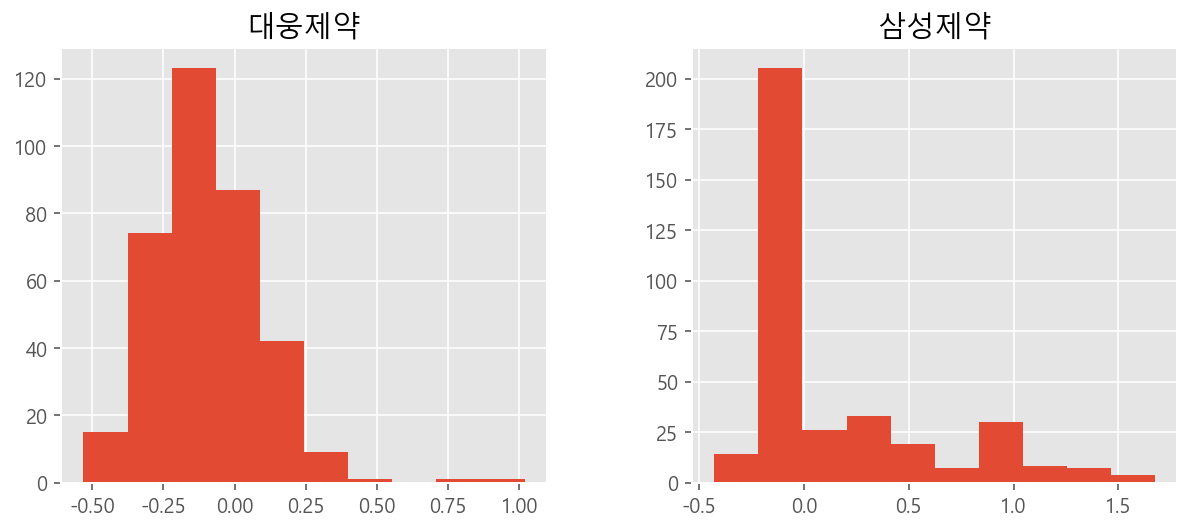

In [72]:
df_plot_norm.hist(figsize=(10, 4))

## 전체 데이터프레임 값에 대한 수익률 계산하기

In [75]:
# 첫번째 날 가격으로 나머지 가격을 나눠주고 -1을 해주면 수익률을 구할 수 있습니다.
# 전체 데이터프레임에 적용합니다.
df_norm  = df / df.iloc[0] - 1
df_norm.head()

Name,CMG제약,KPX생명과학,광동제약,국제약품,녹십자웰빙,대봉엘에스,대성미생물,대웅제약,대원제약,동구바이오제약,동성제약,동화약품,듀켐바이오,메디톡스,명문제약,보령제약,부광약품,삼성바이오로직스,삼성제약,삼진제약
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2020-01-03,-0.040909,0.172638,0.000000,0.014016,-0.018605,-0.004304,0.018634,-0.007326,-0.005817,0.002973,0.003115,-0.004762,-0.025773,0.035927,0.001947,-0.015256,-0.017836,-0.015169,-0.004556,0.008065
2020-01-06,-0.086364,0.104235,-0.013514,-0.003115,-0.055814,-0.025825,0.000000,-0.032967,-0.008694,-0.017660,-0.046729,-0.026190,-0.043299,0.004325,-0.042397,-0.030443,-0.078277,-0.038506,-0.050114,-0.006048
2020-01-07,-0.077273,0.154723,-0.013514,0.054283,-0.046512,-0.015782,0.003106,-0.018315,-0.011634,-0.023606,-0.031153,-0.028571,-0.072165,0.074518,-0.017305,-0.036573,-0.071189,-0.022170,-0.044419,-0.004032
2020-01-08,-0.120455,0.197068,-0.054054,-0.022247,-0.104186,-0.060258,-0.062112,-0.051282,-0.023205,-0.094597,-0.090343,-0.055952,-0.061856,0.048570,-0.082847,-0.076211,-0.060519,-0.046674,-0.105923,-0.040323


### 전체 종목의 수익률 시각화

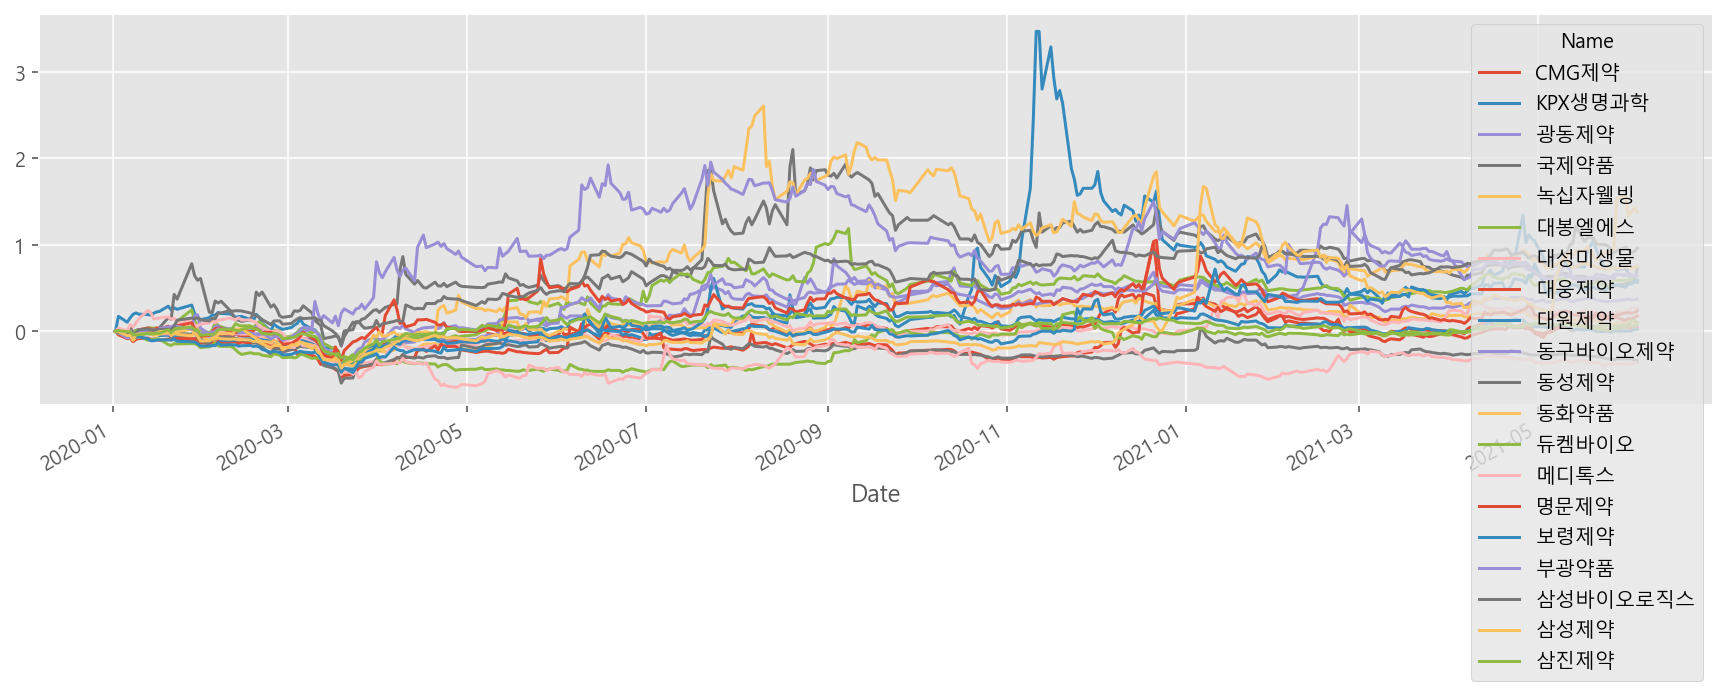

In [77]:
# df_norm 변수에 담긴 전체 종목에 대한 수익률을 시각화 합니다.
df_norm.plot(figsize=(15, 4))

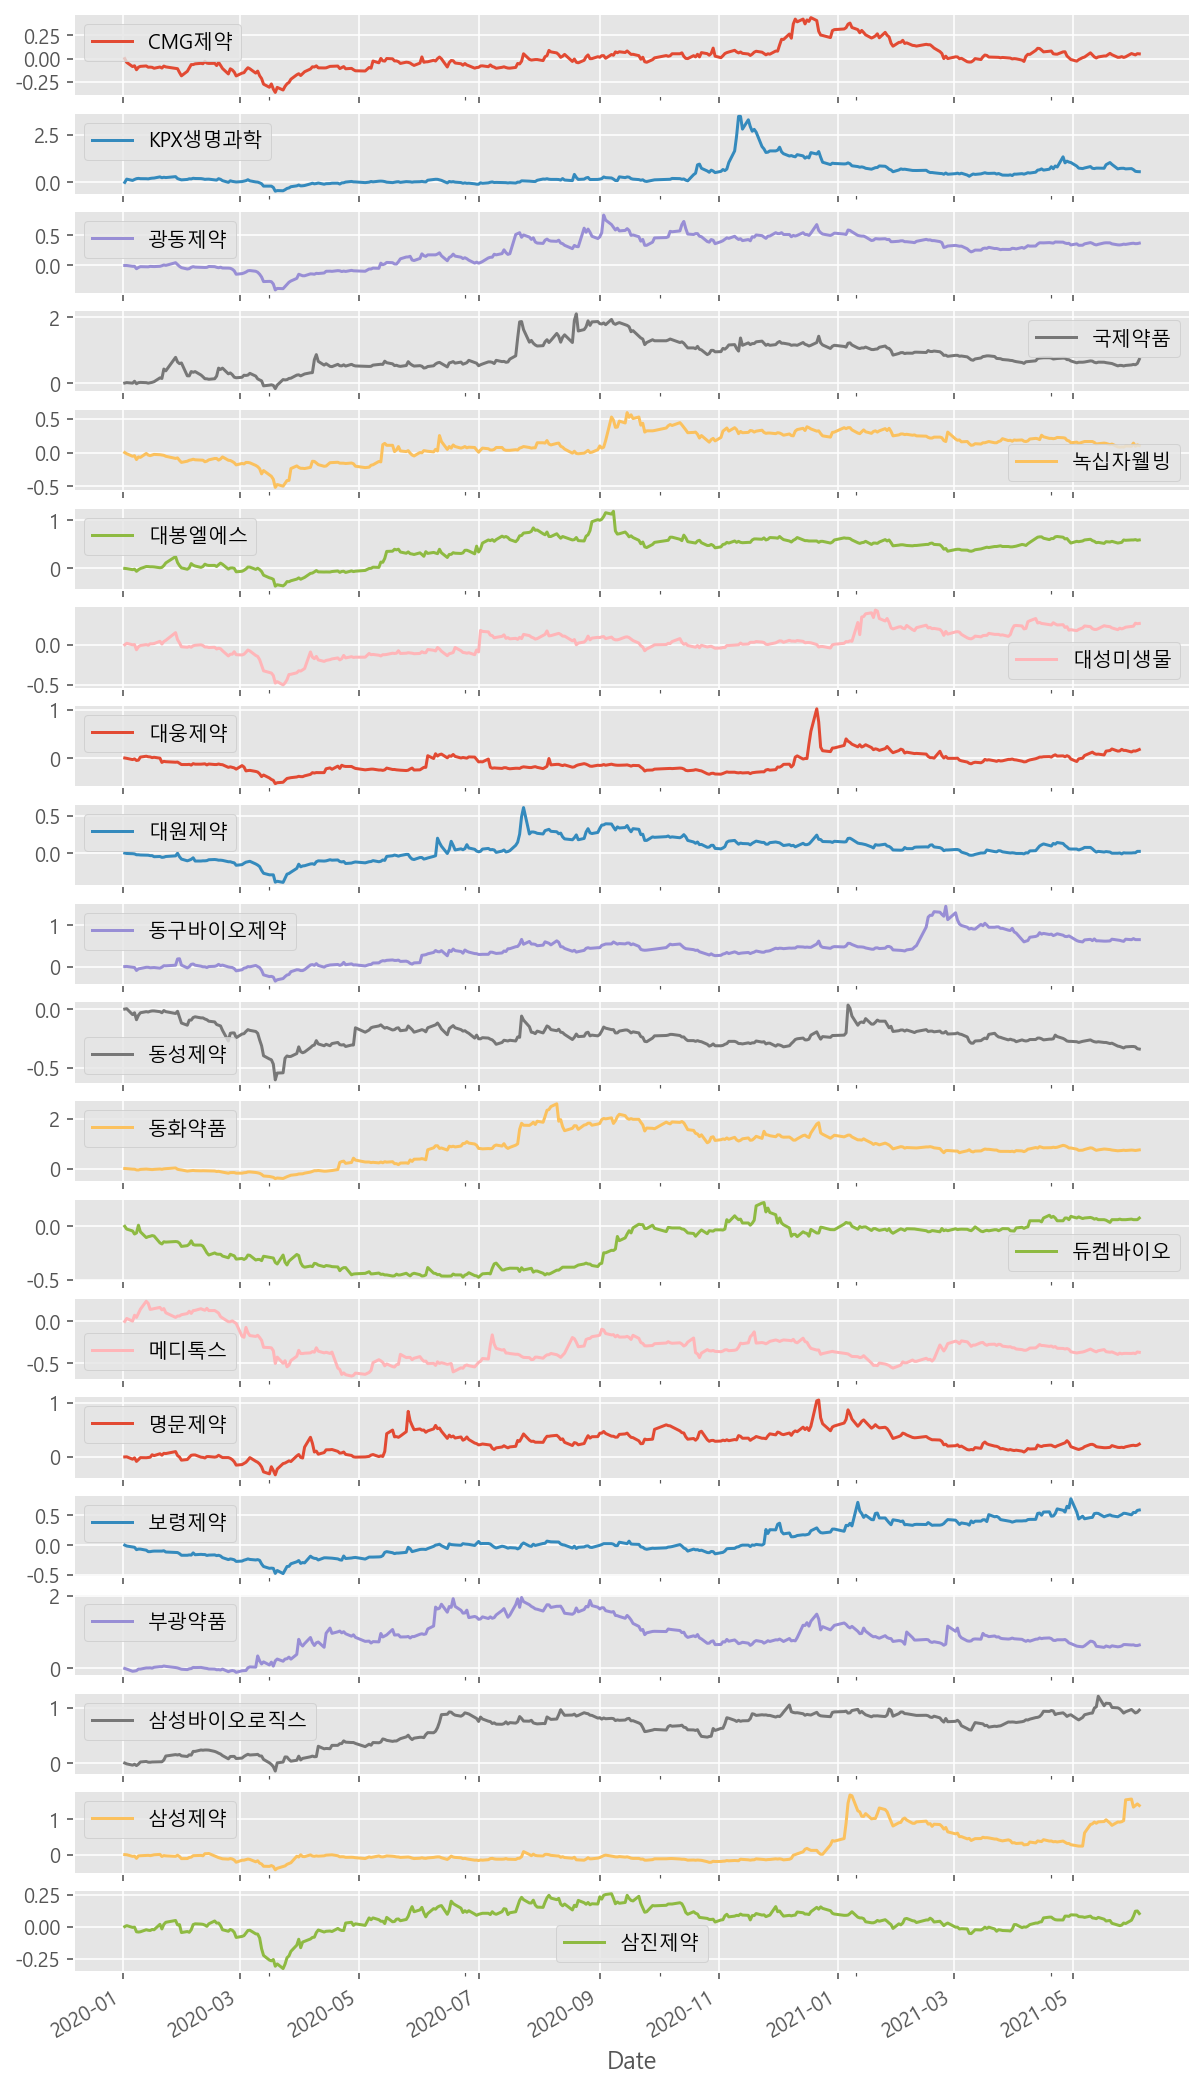

In [80]:
# 서브플롯으로 그립니다.
df_norm.plot(figsize=(10, 20), subplots=True)
plt.show()

In [ ]:
# 계산된 수익률에 대한 기술통계값 구하기
# df_norm


In [ ]:
# 수익률에 대한 히스토그램 그리기


## 왜도와 첨도

* 히스토그램의 분포를 추정해서 밀도추정곡선을 그리기도 합니다.
* 여기에서는 왜도와 첨도를 구해 각 종목의 수익률 분포를 수치화된 데이터로 구해봅니다.

### 왜도
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Negative_and_positive_skew_diagrams_%28English%29.svg/700px-Negative_and_positive_skew_diagrams_%28English%29.svg.png" width="600">



<img src="https://upload.wikimedia.org/wikipedia/commons/c/cc/Relationship_between_mean_and_median_under_different_skewness.png" width="600">


* 비대칭도(非對稱度, skewness) 또는 왜도(歪度)는 실수 값 확률 변수의 확률 분포 비대칭성을 나타내는 지표이다. 왜도의 값은 양수나 음수가 될 수 있으며 정의되지 않을 수도 있다. 
    * 왜도가 음수일 경우에는 확률밀도함수의 왼쪽 부분에 긴 꼬리를 가지며 중앙값을 포함한 자료가 오른쪽에 더 많이 분포해 있다. 
    * 왜도가 양수일 때는 확률밀도함수의 오른쪽 부분에 긴 꼬리를 가지며 자료가 왼쪽에 더 많이 분포해 있다는 것을 나타낸다. 
    * 평균과 중앙값이 같으면 왜도는 0이 된다.
    
* 출처 : [비대칭도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EB%B9%84%EB%8C%80%EC%B9%AD%EB%8F%84)

In [ ]:
# skew 로 수익률의 왜도를 구합니다.


### 첨도

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Standard_symmetric_pdfs.svg/1920px-Standard_symmetric_pdfs.svg.png" width="200">

* 첨도(尖度, 영어: kurtosis 커토시스)는 확률분포의 뾰족한 정도를 나타내는 척도이다. 관측치들이 어느 정도 집중적으로 중심에 몰려 있는가를 측정할 때 사용된다. 
    * 첨도값(K)이 3에 가까우면 산포도가 정규분포에 가깝다. 
    * 3보다 작을 경우에는(K<3) 정규분포보다 더 완만하게 납작한 분포로 판단할 수 있으며, 
    * 첨도값이 3보다 큰 양수이면(K>3) 산포는 정규분포보다 더 뾰족한 분포로 생각할 수 있다.

* 출처 : [첨도 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%B2%A8%EB%8F%84)

In [ ]:
# kurt 로 첨도를 구합니다.



## 상관분석

상관 분석(相關 分析, Correlation analysis) 또는 '상관관계' 또는 '상관'은 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법이다. 두 변수는 서로 독립적인 관계이거나 상관된 관계일 수 있으며 이때 두 변수간의 관계의 강도를 상관관계(Correlation, Correlation coefficient)라 한다. 상관분석에서는 상관관계의 정도를 나타내는 단위로 모상관계수로 ρ를 사용하며 표본 상관 계수로 r 을 사용한다.

상관관계의 정도를 파악하는 상관 계수(相關係數, Correlation coefficient)는 두 변수간의 연관된 정도를 나타낼 뿐 인과관계를 설명하는 것은 아니다. 두 변수간에 원인과 결과의 인과관계가 있는지에 대한 것은 회귀분석을 통해 인과관계의 방향, 정도와 수학적 모델을 확인해 볼 수 있다.

* 출처 : https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D

### 피어슨 상관계수

* r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 을 가진다. 
* 결정계수(coefficient of determination)는 r^2 로 계산하며 이것은 X 로부터 Y 를 예측할 수 있는 정도를 의미한다.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/d4/Correlation_examples2.svg/800px-Correlation_examples2.svg.png" width="500">

```
일반적으로
r이 -1.0과 -0.7 사이이면, 강한 음적 선형관계,
r이 -0.7과 -0.3 사이이면, 뚜렷한 음적 선형관계,
r이 -0.3과 -0.1 사이이면, 약한 음적 선형관계,
r이 -0.1과 +0.1 사이이면, 거의 무시될 수 있는 선형관계,
r이 +0.1과 +0.3 사이이면, 약한 양적 선형관계,
r이 +0.3과 +0.7 사이이면, 뚜렷한 양적 선형관계,
r이 +0.7과 +1.0 사이이면, 강한 양적 선형관계
```

<img src="https://upload.wikimedia.org/wikipedia/commons/3/34/Correlation_coefficient.png" width=500>

* 출처 :  https://ko.wikipedia.org/wiki/%EC%83%81%EA%B4%80_%EB%B6%84%EC%84%9D#%ED%94%BC%EC%96%B4%EC%8A%A8_%EC%83%81%EA%B4%80_%EA%B3%84%EC%88%98



### 상관계수 구하기

In [ ]:
# corr 계산 전에 dropna 를 통해 컬럼기준으로 결측치가 있는 컬럼은 제거합니다.


In [ ]:
# 시각화에서 좀 더 다양한 컬러맵을 사용하고자 한다면 출력해 보세요.
# print(plt.colormaps())

In [ ]:
# 상관 관계를 시각화 합니다.
